In [101]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:

def search_files(folder_path, string, extension):
    files = []

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is a regular file, contains the desired string in its name, and has the .csv extension
        if os.path.isfile(file_path) and string in filename and filename.endswith(extension):
            file = os.path.join(folder_path,filename)
            files.append(file)
            #print(f"File name: {filename}")

    return files
ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]

In [85]:
ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]
for i in ts[9:]:
    folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Replace with the path to your folder
    string = 'ts_' + str(i) +'_'
    #print(string)
    print('reading data for Ts = %d' %i)
    extension = '.dat'
    files = search_files(folder_path,string, extension)


reading data for Ts = 16384


In [86]:
files

['/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_16384_nb_30000_seed_7300_.dat',
 '/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_16384_nb_30000_seed_6955_.dat',
 '/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_16384_nb_30000_seed_7060_.dat',
 '/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_16384_nb_30000_seed_7390_.dat',
 '/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_16384_nb_30000_seed_7150_.dat']

reading data for Ts = 2
reading data for Ts = 8
reading data for Ts = 16
reading data for Ts = 64
reading data for Ts = 128
reading data for Ts = 512
reading data for Ts = 1024
reading data for Ts = 4096
reading data for Ts = 8192
reading data for Ts = 16384


([<matplotlib.axis.XTick at 0x7f08aac5bfd0>,
 [Text(0.0, 0, '2'),
  Text(1.1111111111111112, 0, '8'),
  Text(2.2222222222222223, 0, '16'),
  Text(3.3333333333333335, 0, '64'),
  Text(4.444444444444445, 0, '128'),
  Text(5.555555555555555, 0, '512'),
  Text(6.666666666666667, 0, '1024'),
  Text(7.777777777777779, 0, '4096'),
  Text(8.88888888888889, 0, '8192'),
  Text(10.0, 0, '16384')])

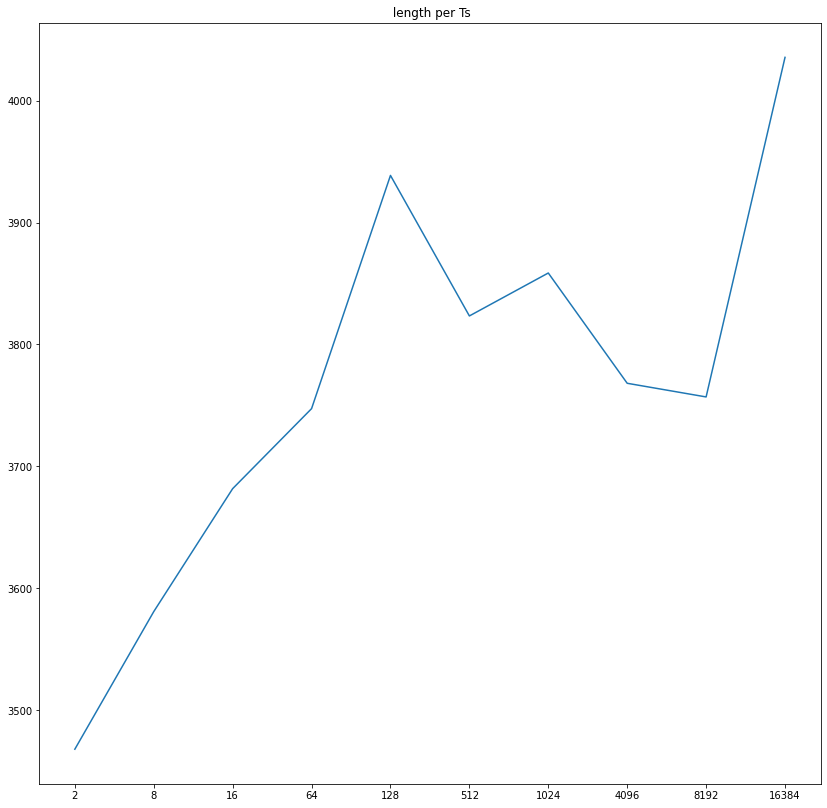

In [105]:
ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]
L = []
x = []
x = np.linspace(0,10,10)
for i in ts[:]:
    folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Replace with the path to your folder
    string = 'ts_' + str(i) +'_'
    #print(string)
    print('reading data for Ts = %d' %i)
    extension = '.dat'
    files = search_files(folder_path,string, extension)
    lengh = 0
    for j in range(len(files)):
        df = pd.read_csv(files[j], delimiter=' ', names=['uid', 'id_part', 'x', 'y', 'z'])
        l = (df['y'].max() + 17) - df['y'].min()
        lengh = lengh + l

    lengh = lengh/len(files)
    L.append(lengh)

plt.figure(figsize=(14,14))
plt.title(' length per Ts')
plt.plot(x,L)
plt.xticks(x[:],ts[:])

In [153]:
def particles(fn, ts, cont):
    fd = 'ts_' + str(ts) + '_' + str(cont) + '.txt'
    with open (fd, "w") as fid:
        with open(fn) as fid2:
            id = 0  # Initialize the id variable outside the loop
            for row in fid2.readlines():
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])

                for i in range(0, 18):
                    fid.write('uid %d %d %d %d\n' % (id, x, y + i, z))



In [159]:
### Densidade por comprimento
ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]
x = np.linspace(0,10,10)
for i in ts[:8]:
    folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Replace with the path to your folder
    string = 'ts_' + str(i) +'_'
    #print(string)
    print('reading data for Ts = %d' %i)
    extension = '.dat'
    files = search_files(folder_path,string, extension)
    for j in range(len(files)):
        particles(files[j], i, j)


reading data for Ts = 2
reading data for Ts = 8
reading data for Ts = 16
reading data for Ts = 64
reading data for Ts = 128
reading data for Ts = 512
reading data for Ts = 1024
reading data for Ts = 4096


In [124]:
files

['/home/robert/collagen_fibril/dla-collagen/python/ts_16384_0.txt',
 '/home/robert/collagen_fibril/dla-collagen/python/ts_16384_1.txt',
 '/home/robert/collagen_fibril/dla-collagen/python/ts_16384_3.txt',
 '/home/robert/collagen_fibril/dla-collagen/python/ts_16384_2.txt',
 '/home/robert/collagen_fibril/dla-collagen/python/ts_16384_4.txt']

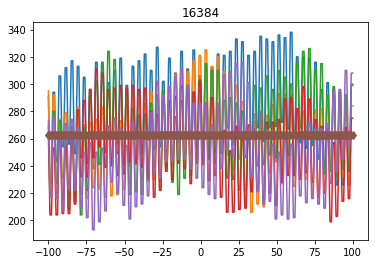

In [166]:
m = 0
for j in range(len(files)):
    df = pd.read_csv(files[j], delimiter=' ', names=['uid', 'id_part', 'x', 'y', 'z'])
    # Get unique values and their counts
    unique_values, counts = np.unique(df['y'], return_counts=True)

    # Filter values within the interval [-100, 100]
    filtered_indices = np.where((unique_values >= -100) & (unique_values <= 100))
    filtered_values = unique_values[filtered_indices]
    filtered_counts = counts[filtered_indices]

    # Create a new dataframe with counts
    df_counts = pd.DataFrame({'Value': filtered_values, 'Count': filtered_counts})
    md_df = df_counts['Count'].sum()/201
    m = m + md_df


    plt.plot(df_counts['Value'], df_counts['Count'])

x = np.linspace(-100,100,201)
y = np.ones(len(x)) * (m/5)

plt.title(i)

plt.plot(x,y, '-d')
#plt.xlim(-100,100)

reading data for Ts = 2


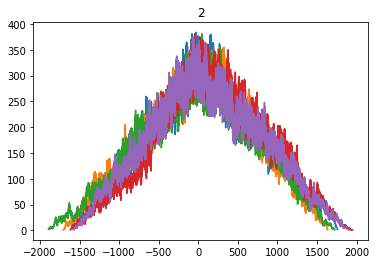

reading data for Ts = 8


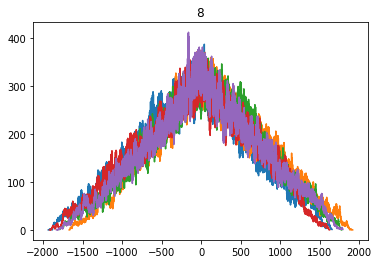

reading data for Ts = 16


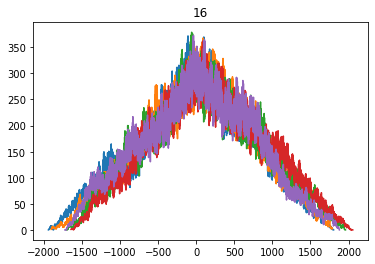

reading data for Ts = 64


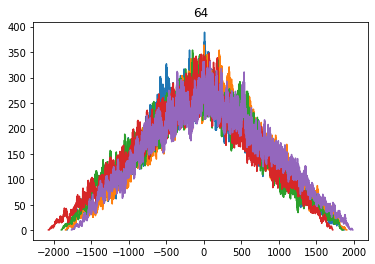

reading data for Ts = 128


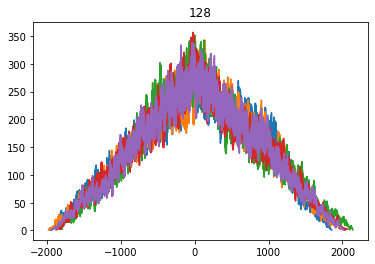

reading data for Ts = 512


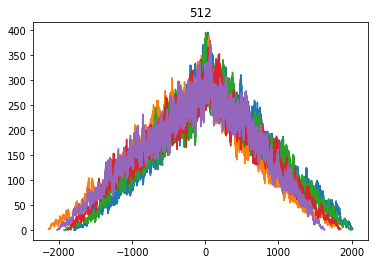

reading data for Ts = 1024


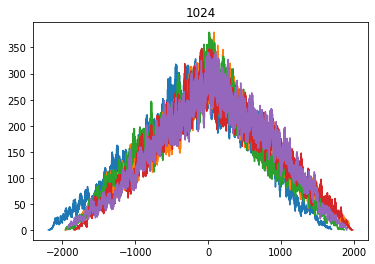

reading data for Ts = 4096


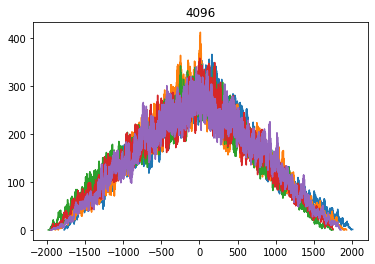

reading data for Ts = 8192


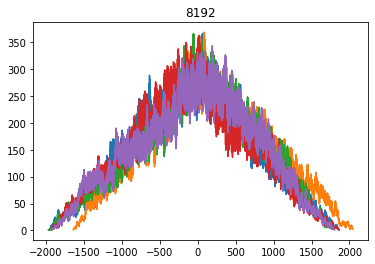

reading data for Ts = 16384


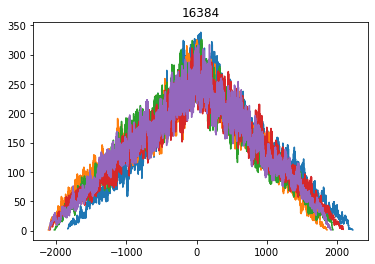

In [160]:
ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]
x = np.linspace(0,10,10)
for i in ts[:]:
    folder_path = '/home/robert/collagen_fibril/dla-collagen/python'  # Replace with the path to your folder
    string = 'ts_' + str(i) +'_'
    #print(string)
    print('reading data for Ts = %d' %i)
    extension = '.txt'
    files = search_files(folder_path,string, extension)
    m = 0
    
    for j in range(len(files)):
        
        df = pd.read_csv(files[j], delimiter=' ', names=['uid', 'id_part', 'x', 'y', 'z'])
        # Get unique values and their counts
        unique_values, counts = np.unique(df['y'], return_counts=True)

        # Create a new dataframe with counts
        df_counts = pd.DataFrame({'Value': unique_values, 'Count': counts})
        md_df = df_counts['Count'].sum()/201
        m = m + md_df


        plt.plot(df_counts['Value'], df_counts['Count'])

    plt.title(i)
    plt.show()
#plt.xlim(-100,100)
    

(-100.0, 100.0)

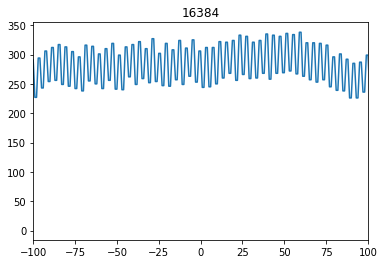

In [132]:
df_counts

plt.plot(df_counts['Value'], df_counts['Count'])
plt.title(i)
plt.xlim(-100,100)

In [ ]:
file = files[0]
file_path = os.path.join(folder_path, file)
df = pd.read_csv(file_path, names=['uid', 'id_part', 'x', 'y', 'z'])

xmin = df['x'].min()
xmax = df['x'].max()
ymin = df['y'].min()
ymax = df['y'].max()
zmin = df['z'].min()
zmax = df['z'].max()

l1 = xmax - xmin
l2 = zmax - zmin

l = ymax - ymin
A = l1 * l2

In [84]:
import pandas as pd
import os

ts = [2, 8, 16, 64, 128, 512, 1024, 4096, 8192, 16384]

for i in ts:
    folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Substitua pelo caminho para a sua pasta
    string = 'ts_' + str(i) + '_'
    extension = '.dat'
    files = search_files(folder_path,string, extension)
    
    if len(files) == 0:
        continue
    
    l_values = []
    A_values = []
    
    print(len(files))
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, names=['uid', 'id_part', 'x', 'y', 'z'])
        
        xmin = df['x'].min()
        xmax = df['x'].max()
        ymin = df['y'].min()
        ymax = df['y'].max()
        zmin = df['z'].min()
        zmax = df['z'].max()
        
        l1 = xmax - xmin
        l2 = zmax - zmin
        
        l = ymax - ymin
        A = l1 * l2
        
        l_values.append(l)
        A_values.append(A)
    
    l_mean = sum(l_values) / len(l_values)
    A_mean = sum(A_values) / len(A_values)
    
    print("For Ts = %d" % i)
    print("Average l: %f" % l_mean)
    print("Average A: %f" % A_mean)
    print()


5
For Ts = 2
Average l: nan
Average A: nan

5
For Ts = 8
Average l: nan
Average A: nan

5
For Ts = 16
Average l: nan
Average A: nan

5
For Ts = 64
Average l: nan
Average A: nan

5
For Ts = 128
Average l: nan
Average A: nan

5
For Ts = 512
Average l: nan
Average A: nan

5
For Ts = 1024
Average l: nan
Average A: nan

5
For Ts = 4096
Average l: nan
Average A: nan

5
For Ts = 8192
Average l: nan
Average A: nan

5
For Ts = 16384
Average l: nan
Average A: nan



In [79]:
At

[[992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992],
 [992, 992, 992, 992, 992]]

In [59]:
for i in ts[:]:
    folder_path = '/home/robert/data_zurik/fibrilas_usadas/'  # Replace with the path to your folder
    string = 'ts_' + str(i) +'_'
    #print(string)
    print('reading data for Ts = %d' %i)
    extension = '.dat'
    files = search_files(folder_path,string, extension)
    A0 = []
    l0 = []
    for j in files:
        print(j)
        data = pd.read_csv(j, header=None, delimiter='\s+')
        # Set column names for reference
        df.columns = ['id_rod', 'id_part', 'x', 'y', 'z']
        #display(df)
        # Extract the desired columns
        column2_values = df['x']
        column4_values = df['z']
        column3_values = df['y']

        # Calculate the minimum and maximum values
        column2_min = column2_values.min()
        column2_max = column2_values.max()
        column3_min = column3_values.min()
        column3_max = column3_values.max()
        column4_min = column4_values.min()
        column4_max = column4_values.max()

        # Print the results
        #print("x - Min:", column2_min)
        #print("x - Max:", column2_max)
        #print("y - Min:", column3_min)
        #print("y - Max:", column3_max)
        #print("z - Min:", column4_min)
        #print("z - Max:", column4_max)

        l1 = column4_max - column4_min
        l2 = column2_max - column2_min
        A0.append(l1*l2)
        l0.append(column3_max - column3_min)
        print(l1*l2)
        #print('min box %d: %d' % (ts[0], A))
        #print('lenght: %d' %lenght)
    
    print('data fiber ts: %d' %i)
    print('mediun area: %d' %(sum(A0)/len(A0)))
    print('mediun length: %d' %(sum(l0)/len(l0)))
    print('########################################################3')

                

reading data for Ts = 2
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_2_nb_30000_seed_490_.dat
4725
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_2_nb_30000_seed_715_.dat
4725
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_2_nb_30000_seed_445_.dat
4725
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_2_nb_30000_seed_460_.dat
4725
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_2_nb_30000_seed_325_.dat
4725
data fiber ts: 2
mediun area: 4725
mediun length: 3324
########################################################3
reading data for Ts = 8
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_8_nb_30000_seed_1030_.dat
4725
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_8_nb_30000_seed_1285_.dat
4725
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_8_nb_30000_seed_880_.dat
4725
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_8_nb_30000_seed_1435_.dat
4725
/home/robert/data_zurik/fibrilas_usadas/dla_mode_s_ts_8_nb_30000_seed_1390_.dat
